In [169]:
import json
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = 'workdir/data/contest_input.json'

json_file = json.load(open(DATA_PATH, 'r'))

In [119]:
json_file['orders']

{'10001': {'order_id': 10001,
  'pickup_point_id': 40001,
  'pickup_from': 480,
  'pickup_to': 570,
  'pickup_location_x': 284,
  'pickup_location_y': 235,
  'dropoff_point_id': 60001,
  'dropoff_from': 600,
  'dropoff_to': 960,
  'dropoff_location_x': 252,
  'dropoff_location_y': 197,
  'payment': 313},
 '10003': {'order_id': 10003,
  'pickup_point_id': 40003,
  'pickup_from': 390,
  'pickup_to': 1020,
  'pickup_location_x': 225,
  'pickup_location_y': 141,
  'dropoff_point_id': 60003,
  'dropoff_from': 1050,
  'dropoff_to': 1080,
  'dropoff_location_x': 115,
  'dropoff_location_y': 38,
  'payment': 380},
 '10005': {'order_id': 10005,
  'pickup_point_id': 40005,
  'pickup_from': 300,
  'pickup_to': 780,
  'pickup_location_x': 233,
  'pickup_location_y': 108,
  'dropoff_point_id': 60005,
  'dropoff_from': 840,
  'dropoff_to': 870,
  'dropoff_location_x': 12,
  'dropoff_location_y': 101,
  'payment': 482},
 '10008': {'order_id': 10008,
  'pickup_point_id': 40008,
  'pickup_from': 360,
 

In [132]:
orders = json_file['orders']
orders_pickup_times_0 = np.array([(order['pickup_from'], order['pickup_to']) for order in orders.values()])
orders_pickup_times = np.array([((10 * (order['pickup_from'] // 10)), (10 * (order['pickup_to'] // 10))) for order in orders.values()])
orders_drop_times = np.array([((10 * (order['dropoff_from'] // 10)), (10 * (order['dropoff_to'] // 10))) for order in orders.values()])
orders_from = np.array([(order['pickup_location_x'], order['pickup_location_y']) for order in orders.values()])
orders_to = np.array([(order['dropoff_location_x'], order['dropoff_location_y']) for order in orders.values()])
payments = np.array([(order['payment']) for order in orders.values()])

In [173]:
orders = json_file['orders']
payments = np.array([(order['payment']) for order in orders])

In [175]:
sum(payments)

2836613

In [122]:
end_min_start = orders_drop_times[:, 0] - orders_pickup_times[:, 1]

In [141]:
dists = np.abs(orders_to - orders_from).sum(axis=1)

In [148]:
((payments - (2 * dists + 10) > 300)).sum()

322

In [164]:
payments = np.array([(order['payment']) for order in orders.values()])

1998388

(array([2.769e+03, 1.690e+03, 3.690e+02, 1.050e+02, 2.400e+01, 8.000e+00,
        3.000e+00, 0.000e+00, 6.000e+00, 1.000e+00]),
 array([ 0.        ,  3.39142857,  6.78285714, 10.17428571, 13.56571429,
        16.95714286, 20.34857143, 23.74      , 27.13142857, 30.52285714,
        33.91428571]),
 <a list of 10 Patch objects>)

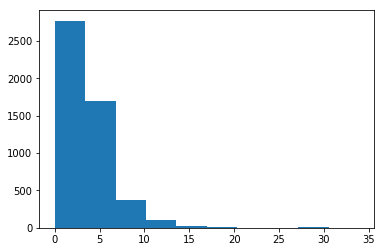

In [163]:
plt.hist(payments[dists > 20] / (dists[dists > 20]))

(array([1.900e+01, 1.350e+02, 7.880e+02, 2.631e+03, 1.533e+03, 1.640e+02,
        9.100e+01, 6.000e+00, 1.000e+00, 1.000e+00]),
 array([-454. , -296.9, -139.8,   17.3,  174.4,  331.5,  488.6,  645.7,
         802.8,  959.9, 1117. ]),
 <a list of 10 Patch objects>)

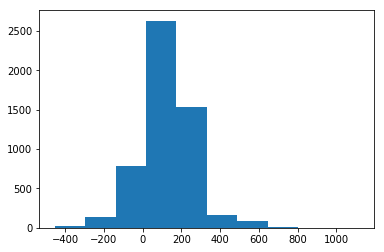

In [136]:
plt.hist((payments - 2 * dists))

In [124]:
((end_min_start - dists) > 10).sum()

105

(array([  2.,   2.,   1.,   4.,  11.,  23.,  18.,  25.,  56.,  79., 120.,
        175., 257., 388., 424., 592., 715., 759., 730., 481., 332., 113.,
         17.,  15.,   7.,   6.,   8.,   4.,   2.,   0.,   2.,   1.]),
 array([-841.    , -801.3125, -761.625 , -721.9375, -682.25  , -642.5625,
        -602.875 , -563.1875, -523.5   , -483.8125, -444.125 , -404.4375,
        -364.75  , -325.0625, -285.375 , -245.6875, -206.    , -166.3125,
        -126.625 ,  -86.9375,  -47.25  ,   -7.5625,   32.125 ,   71.8125,
         111.5   ,  151.1875,  190.875 ,  230.5625,  270.25  ,  309.9375,
         349.625 ,  389.3125,  429.    ]),
 <a list of 32 Patch objects>)

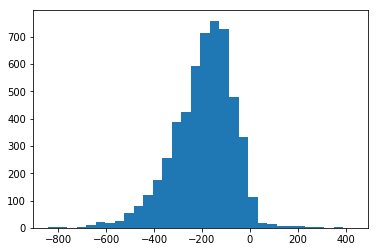

In [125]:
plt.hist(end_min_start - dists, 32)

In [126]:
remove_ids = ((orders_drop_times[:, 1] - (orders_pickup_times[:, 0] + dists)) < 0).sum()

In [128]:
dists

array([ 70, 213, 228, ..., 136,  64, 172])

In [115]:
all_points = np.vstack([orders_from, orders_to])

In [113]:
((orders_drop_times[:, 1] - (orders_pickup_times[:, 0] + dists)) < 0).sum()

1454

In [82]:
points_available = np.zeros((all_points.shape[0], 144))
cnt = 0
for fr, to in orders_pickup_times:
    points_available[cnt, (fr // 10):(to // 10)] = 1
    cnt += 1
    
for fr, to in orders_drop_times:
    points_available[cnt, (fr // 10):(to // 10)] = 1
    cnt += 1

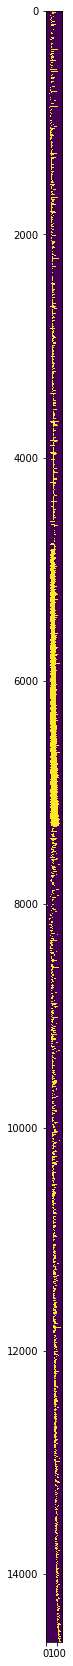

In [84]:
plt.figure(figsize=(10, 30))
plt.imshow(points_available)

(array([ 36., 105., 102., 105., 110., 117., 111.,  81., 145., 114., 109.,
        139., 137., 141., 116., 172., 168., 110., 184., 163., 177., 146.,
        146., 166., 117., 134., 138., 160., 132., 166., 154., 149., 113.,
        154., 145.,  97., 143., 118., 133.,  95., 122., 114.,  76., 109.,
         93., 103.,  77.,  85.,  86.,  57.,  78.,  87.,  67.,  50.,  59.,
         53.,  52.,  45.,  58.,  49.,  46.,  42.,  37.,  38.,  36.,  18.,
         28.,  18.,  17.,  23.,  16.,  17.,  22.,  17.,  13.,  15.,  11.,
         10.,  16.,  10.,   7.,   9.,   3.,   8.,  16.,   3.,   7.,   6.,
          5.,   3.,   3.,   2.,   1.,   2.,   2.,   2.,   3.,   1.,   0.,
          2.]),
 array([  0.  ,   4.72,   9.44,  14.16,  18.88,  23.6 ,  28.32,  33.04,
         37.76,  42.48,  47.2 ,  51.92,  56.64,  61.36,  66.08,  70.8 ,
         75.52,  80.24,  84.96,  89.68,  94.4 ,  99.12, 103.84, 108.56,
        113.28, 118.  , 122.72, 127.44, 132.16, 136.88, 141.6 , 146.32,
        151.04, 155.76, 160.48

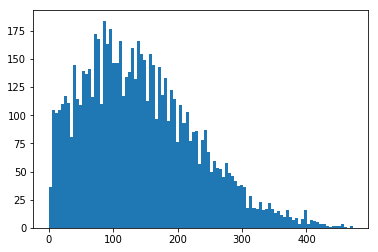

In [57]:
plt.hist(np.abs(orders_from - orders_to).sum(axis=1), 100)

In [43]:
orders_drop_times

array([[ 600,  960],
       [ 630,  660],
       [1050, 1080],
       ...,
       [1100, 1200],
       [1170, 1200],
       [1200, 1230]])

In [35]:
np.unique(orders_pickup_times[:, 1])

array([  30,   90,  270,  300,  330,  340,  360,  390,  420,  440,  450,
        470,  480,  490,  500,  510,  520,  540,  550,  560,  570,  580,
        590,  600,  610,  630,  640,  650,  660,  680,  690,  700,  710,
        720,  730,  740,  750,  760,  770,  780,  790,  800,  810,  820,
        830,  840,  850,  860,  870,  880,  890,  900,  920,  930,  940,
        950,  960,  970,  980,  990, 1000, 1010, 1020, 1030, 1040, 1050,
       1070, 1080, 1100, 1110, 1120, 1140, 1170, 1190, 1200, 1230])

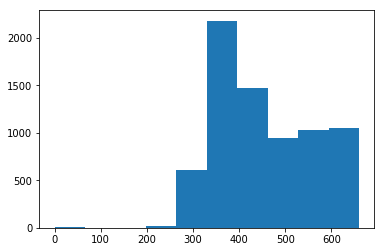

In [45]:
plt.hist(orders_pickup_times[:, 0])
plt.show()

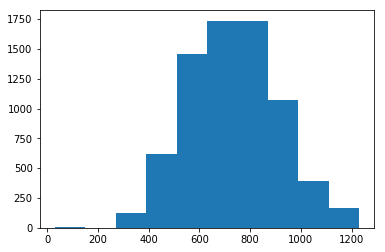

In [46]:
plt.hist(orders_pickup_times[:, 1])
plt.show()

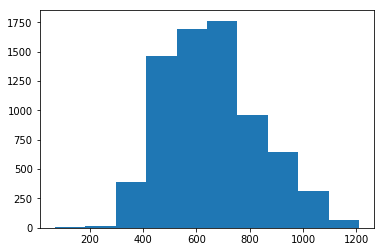

In [47]:
plt.hist(orders_drop_times[:, 0])
plt.show()

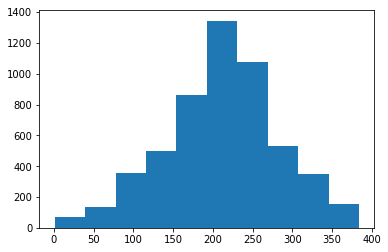

In [176]:
plt.hist(orders_from[:, 0])
plt.show()

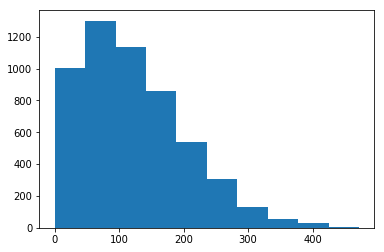

In [178]:
plt.hist(dists)
plt.show()